In [ ]:
1. Understanding the data
2. 

In [7]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [33]:
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



In [42]:
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [10]:
df.shape

(200, 4)

In [11]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot: xlabel='TV', ylabel='Sales'>

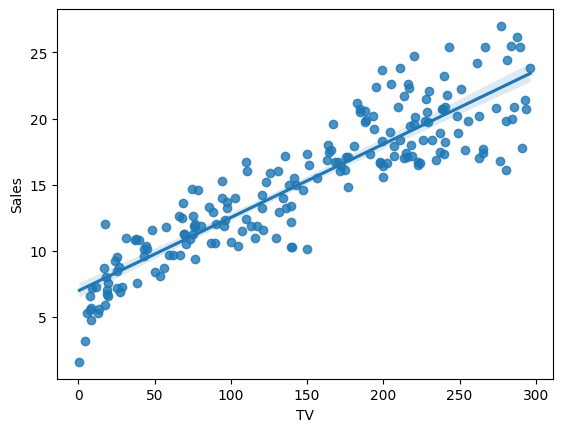

In [13]:
sns.regplot(data=df, x='TV', y='Sales')

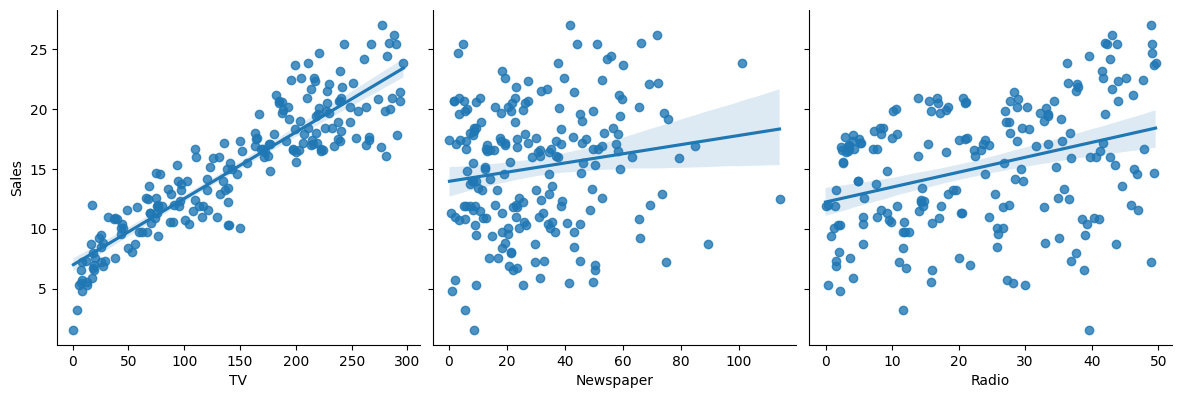

In [14]:
sns.pairplot(data=df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='reg')
plt.show()

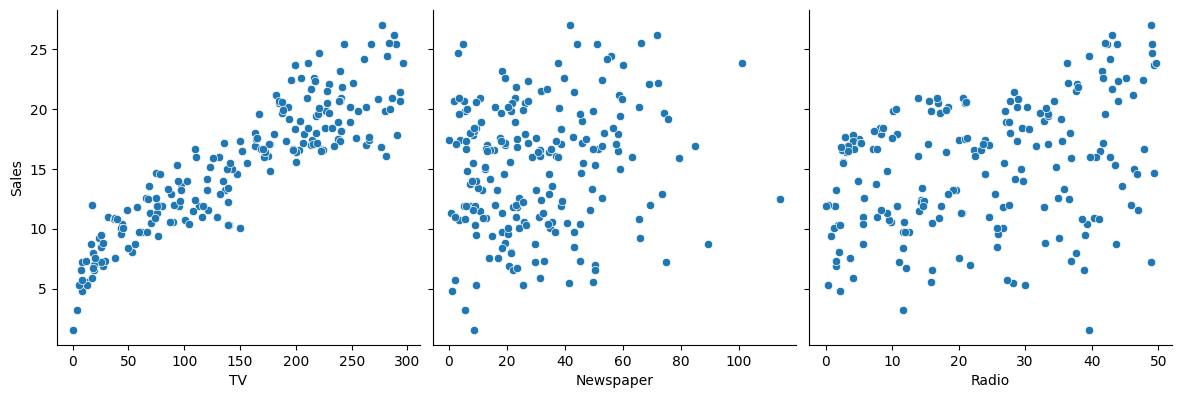

In [15]:
sns.pairplot(data=df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales',size=4, aspect=1, kind='scatter')
plt.show()

In [16]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<AxesSubplot: >

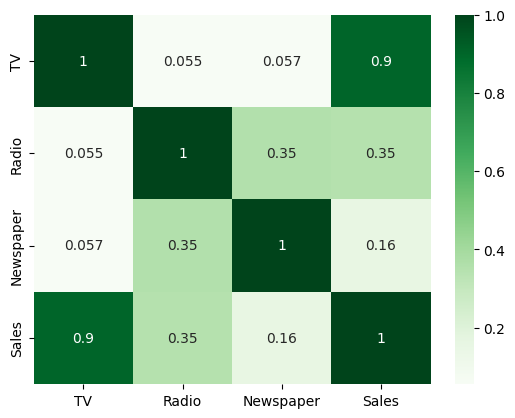

In [17]:
## plot the corr with  the heat map
sns.heatmap(df.corr(), annot=True, cmap='Greens')

---
## Step 3: Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

Steps:
- Create X and Y
- Create train and test data sets (70-30, 80-20)
- Train the model in the training set(i.e learn the coefficients)
- Evaluate on the model on the training set and test set

In [18]:
# Create X and Y
# X is uppercase defined, y is lower case defined
# X could be a dataframe, y is a single column

X = df['TV']
y = df.Sales

In [19]:
# train-test split module - Getting the training set and test set both for X and y

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.70, random_state=100)
X_train.shape

(140,)

In [20]:
## Training the model

### adding the constatnt
X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [21]:
# fitting the model
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [22]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Wed, 22 Feb 2023   Prob (F-statistic):           1.52e-52
Time:                        23:25:12   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

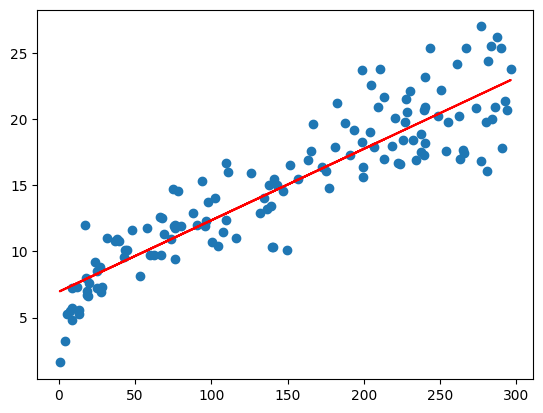

In [24]:
y_train_pred = 6.948 + 0.054*X_train

plt.scatter(X_train, y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

# Residual Analysis and Predictions

In [ ]:
# error = y_train, y_train_predicted

In [25]:
res = y_train - y_train_pred


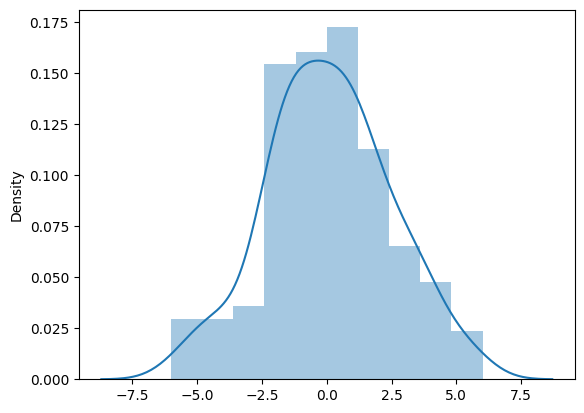

In [28]:
## plot the residual
plt.figure()
sns.distplot(res)
plt.show()


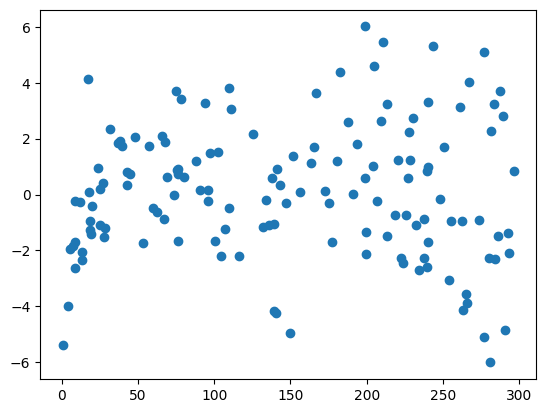

In [29]:
## look for patters in the residual

plt.scatter(X_train, res)

# STEP 4 : Predictions And Evaluation of Test set

In [ ]:
# make prediction on test set
# evaluate the model, r-squared, on the test

In [32]:
# add constant to the X_test
X_test_sm = sm.add_constant(X_test)

# predict the test
y_test_pred = lr_model.predict(X_test_sm)


In [34]:
# evaluate the model, r-squared, on the test

# r-squared
r2 = r2_score(y_true=y_test, y_pred=y_test_pred)
r2

0.792103160124566

In [35]:
r2_score(y_true=y_train, y_pred=y_train_pred)


0.8155000015031005

In [36]:
# mean-squared-error
mean_squared_error(y_true=y_test, y_pred=y_test_pred)

4.077556371826953

In [37]:
mean_squared_error(y_true=y_train, y_pred=y_train_pred)

5.761559928571429

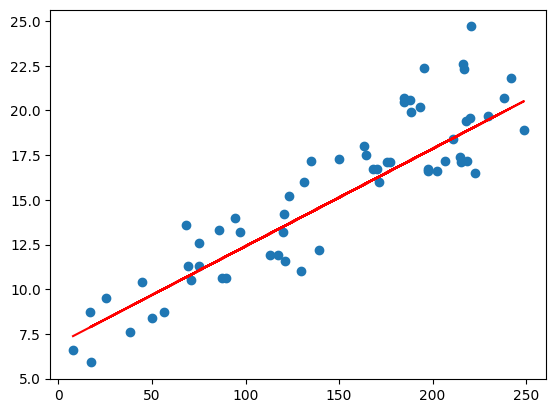

In [38]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

# Linear Regression using SKLearn

## Steps in sklearn model building
1. Create an object of linear regression
2. fit the model
3. see the parameters, make predictions (train,test)
4. Evaluate - (r2, mean etc)

In [39]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [40]:
# 1. Create X and y
X = df['TV']
y = df['Sales']

In [41]:
# 2. Get the train and test sets
X_train, X_test, y_train, y_test  = train_test_split(X,y, train_size=0.70, random_state=100)

In [53]:
## resahpe the X_train from 1D to 2D, from (140,) to (140,1)

print(X_train.shape)
X_train_lm = X_train.values.reshape(-1,1)
print(X_train_lm.shape)

X_test_lm = X_test.values.reshape(-1,1)
print(X_test_lm.shape)

(140,)
(140, 1)
(60, 1)


In [49]:
## Steps in sklearn model building
# 1. Create an object of linear regression
lm = LinearRegression()


# 2. fit the model

lm.fit(X_train_lm, y_train)


LinearRegression()

In [51]:

# 3. see the parameters, make predictions (train,test)
print(lm.coef_)
print(lm.intercept_)



[0.05454575]
6.948683200001357


In [55]:
# make predictions
y_train_pred = lm.predict(X_train_lm)

y_test_pred = lm.predict(X_test_lm)


In [56]:

# 4. Evaluate the model
print(r2_score(y_true=y_train, y_pred=y_train_pred))
print(r2_score(y_true=y_test, y_pred=y_test_pred))

0.8157933136480389
0.7921031601245662
